In [1]:
import tensorflow as tf
import numpy as np

C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\shrih\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
def walk_through_dir(dir_path):
    """
    Walk through dir_path returning its content

    Args:
        dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdirectories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [3]:
walk_through_dir("Vegetable Images")

There are 3 directories and 0 images in 'Vegetable Images'.
There are 15 directories and 0 images in 'Vegetable Images\test'.
There are 0 directories and 200 images in 'Vegetable Images\test\Bean'.
There are 0 directories and 200 images in 'Vegetable Images\test\Bitter_Gourd'.
There are 0 directories and 200 images in 'Vegetable Images\test\Bottle_Gourd'.
There are 0 directories and 200 images in 'Vegetable Images\test\Brinjal'.
There are 0 directories and 200 images in 'Vegetable Images\test\Broccoli'.
There are 0 directories and 200 images in 'Vegetable Images\test\Cabbage'.
There are 0 directories and 200 images in 'Vegetable Images\test\Capsicum'.
There are 0 directories and 200 images in 'Vegetable Images\test\Carrot'.
There are 0 directories and 200 images in 'Vegetable Images\test\Cauliflower'.
There are 0 directories and 200 images in 'Vegetable Images\test\Cucumber'.
There are 0 directories and 200 images in 'Vegetable Images\test\Papaya'.
There are 0 directories and 200 image

In [4]:
train_dir = "Vegetable Images/train"
test_dir = "Vegetable Images/test"
validation = "Vegetable Images/validation"

In [5]:
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size=IMG_SIZE,
                                                               label_mode='categorical',
                                                               batch_size=32,
                                                               shuffle=False)

validate_data = tf.keras.preprocessing.image_dataset_from_directory(directory=validation,
                                                                   label_mode='categorical',
                                                                   batch_size=32,
                                                                   image_size=IMG_SIZE,
                                                                   )

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [6]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [7]:
train_data.class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

## Data Augmentation layer

In [8]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2)
], name = "Data_Augmentation")

## Base_Modal

In [9]:
base_model = tf.keras.applications.EfficientNetB1(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = "input_layer")
x = data_augmentation(inputs) # augment images
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Pooling_Layer")(x)
outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)


27018416/27018416 [==============================] - 10s 0us/step


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_Augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb1 (Functional  (None, None, None, 1280   6575239   
 )                           )                                   
                                                                 
 Pooling_Layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 output_layer (Dense)        (None, 15)                19215     
                                                             

In [11]:
# Modal compile
model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

history_1 = model.fit(train_data,
                     epochs=5,
                     validation_data=validate_data)

Epoch 1/5


469/469 [==============================] - 464s 968ms/step - loss: 0.2969 - accuracy: 0.9502 - val_loss: 0.0561 - val_accuracy: 0.9910
Epoch 2/5
469/469 [==============================] - 481s 1s/step - loss: 0.0472 - accuracy: 0.9935 - val_loss: 0.0269 - val_accuracy: 0.9957
Epoch 3/5
469/469 [==============================] - 467s 995ms/step - loss: 0.0280 - accuracy: 0.9963 - val_loss: 0.0169 - val_accuracy: 0.9980
Epoch 4/5
469/469 [==============================] - 476s 1s/step - loss: 0.0196 - accuracy: 0.9969 - val_loss: 0.0121 - val_accuracy: 0.9983
Epoch 5/5
469/469 [==============================] - 473s 1s/step - loss: 0.0147 - accuracy: 0.9975 - val_loss: 0.0100 - val_accuracy: 0.9983


In [12]:
predict_1 = model.predict(test_data)
predict_1

94/94 [==============================] - 76s 781ms/step


array([[9.99152899e-01, 1.45849335e-05, 2.96006998e-04, ...,
        7.10501808e-06, 2.20674992e-05, 5.85605039e-06],
       [9.97098684e-01, 4.32870220e-05, 1.14903069e-05, ...,
        4.40558051e-06, 9.80707584e-04, 2.55221698e-06],
       [9.97039318e-01, 9.89894615e-04, 3.19914834e-04, ...,
        7.87663430e-06, 2.00821614e-05, 2.40901136e-05],
       ...,
       [3.42306066e-07, 1.27337239e-06, 3.94016679e-05, ...,
        1.60501429e-07, 2.03424929e-06, 9.99272764e-01],
       [8.61127191e-05, 2.35071464e-04, 3.58960096e-06, ...,
        7.98032212e-04, 1.68961962e-03, 9.94827688e-01],
       [1.33100475e-04, 6.54527685e-04, 2.74347910e-03, ...,
        4.25817270e-05, 6.25443718e-05, 8.25497627e-01]], dtype=float32)

In [13]:
predict_1.shape

(3000, 15)

In [14]:
# What does the first probability look's like?
predict_1[0], len(predict_1[0]), sum(predict_1[0]), predict_1[0].argmax()

(array([9.99152899e-01, 1.45849335e-05, 2.96006998e-04, 3.26124177e-06,
        1.91701438e-05, 2.48554414e-07, 2.15816567e-06, 8.75734768e-05,
        8.27366648e-07, 3.87807842e-04, 4.41706817e-07, 1.50725903e-08,
        7.10501808e-06, 2.20674992e-05, 5.85605039e-06], dtype=float32),
 15,
 1.0000000228583197,
 0)

In [15]:
print(f"Number of prediction probabilities for sample: {len(predict_1[0])}")
print(f"What prediction probability sample 0 look like:\n {predict_1[0]}")
print(f"The class with the highest probability by the model for sample 0:{predict_1[0].argmax()}")

Number of prediction probabilities for sample: 15
What prediction probability sample 0 look like:
 [9.99152899e-01 1.45849335e-05 2.96006998e-04 3.26124177e-06
 1.91701438e-05 2.48554414e-07 2.15816567e-06 8.75734768e-05
 8.27366648e-07 3.87807842e-04 4.41706817e-07 1.50725903e-08
 7.10501808e-06 2.20674992e-05 5.85605039e-06]
The class with the highest probability by the model for sample 0:0


In [36]:
test_data.class_names[0]

'Bean'

## Plot Accuracy & Val_Accuracy to further Evalution

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shrih\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

Text(0, 0.5, 'Accuracy')

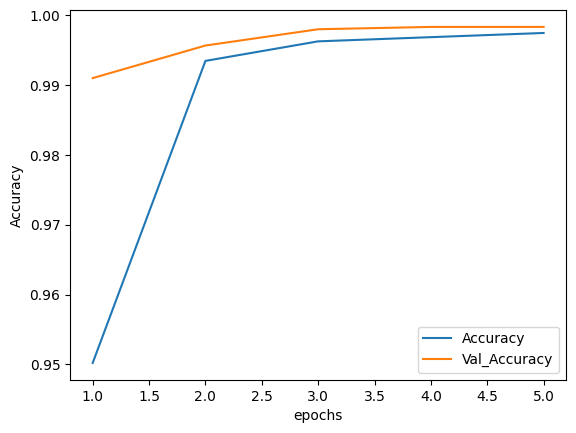

In [18]:
q = len(history_1.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1, 1+q), y = history_1.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1, 1+q), y = history_1.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [19]:
y_labels = []
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax()) # currently test labels look like [0, 0, 0, 1, 0, 0] we want to index value where the "1" occurs
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
pred_classes = predict_1.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
print(classification_report(y_true = y_labels,
                           y_pred = pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      0.98      0.99       200
           2       0.99      1.00      1.00       200
           3       0.99      0.99      0.99       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       200
           9       0.99      0.98      0.99       200
          10       0.99      0.99      0.99       200
          11       1.00      1.00      1.00       200
          12       1.00      1.00      1.00       200
          13       1.00      1.00      1.00       200
          14       1.00      1.00      1.00       200

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00   

In [23]:
accuracy = accuracy_score(y_labels, pred_classes)
accuracy

0.997

### Finding out the most wrong prediction

In [27]:
# Get all of the image file paths in the test dataset
filepaths = []
for filepath in test_data.list_files("Vegetable Images/test/*/*.jpg",
                                    shuffle=False):
    filepaths.append(filepath.numpy())
filepaths[:10]

[b'Vegetable Images\\test\\Bean\\0001.jpg',
 b'Vegetable Images\\test\\Bean\\0002.jpg',
 b'Vegetable Images\\test\\Bean\\0003.jpg',
 b'Vegetable Images\\test\\Bean\\0004.jpg',
 b'Vegetable Images\\test\\Bean\\0005.jpg',
 b'Vegetable Images\\test\\Bean\\0006.jpg',
 b'Vegetable Images\\test\\Bean\\0007.jpg',
 b'Vegetable Images\\test\\Bean\\0008.jpg',
 b'Vegetable Images\\test\\Bean\\0009.jpg',
 b'Vegetable Images\\test\\Bean\\0010.jpg']

In [29]:
# 2. Create a DataFrame of different parameters for each of our test images
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                       "y_true": y_labels,
                       "y_pred": pred_classes,
                       "pred_conf": predict_1.max(axis=1), # get the maximum prediction probability value
                       "y_true_classname": [test_data.class_names[i] for i in y_labels],
                       "y_pred_classname": [test_data.class_names[i] for i in pred_classes]})

In [30]:
pred_df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'Vegetable Images\\test\\Bean\\0001.jpg',0,0,0.999153,Bean,Bean
1,b'Vegetable Images\\test\\Bean\\0002.jpg',0,0,0.997099,Bean,Bean
2,b'Vegetable Images\\test\\Bean\\0003.jpg',0,0,0.997039,Bean,Bean
3,b'Vegetable Images\\test\\Bean\\0004.jpg',0,0,0.999792,Bean,Bean
4,b'Vegetable Images\\test\\Bean\\0005.jpg',0,0,0.998696,Bean,Bean
...,...,...,...,...,...,...
2995,b'Vegetable Images\\test\\Tomato\\1196.jpg',14,14,0.998069,Tomato,Tomato
2996,b'Vegetable Images\\test\\Tomato\\1197.jpg',14,14,0.999934,Tomato,Tomato
2997,b'Vegetable Images\\test\\Tomato\\1198.jpg',14,14,0.999273,Tomato,Tomato
2998,b'Vegetable Images\\test\\Tomato\\1199.jpg',14,14,0.994828,Tomato,Tomato


In [32]:
# 3. Find out in our DataFrame which prediction are wrong
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'Vegetable Images\\test\\Bean\\0001.jpg',0,0,0.999153,Bean,Bean,True
1,b'Vegetable Images\\test\\Bean\\0002.jpg',0,0,0.997099,Bean,Bean,True
2,b'Vegetable Images\\test\\Bean\\0003.jpg',0,0,0.997039,Bean,Bean,True
3,b'Vegetable Images\\test\\Bean\\0004.jpg',0,0,0.999792,Bean,Bean,True
4,b'Vegetable Images\\test\\Bean\\0005.jpg',0,0,0.998696,Bean,Bean,True


In [34]:
pred_df[pred_df["pred_correct"] == False]

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
214,b'Vegetable Images\\test\\Bitter_Gourd\\1215.jpg',1,2,0.605176,Bitter_Gourd,Bottle_Gourd,False
325,b'Vegetable Images\\test\\Bitter_Gourd\\1326.jpg',1,9,0.831345,Bitter_Gourd,Cucumber,False
360,b'Vegetable Images\\test\\Bitter_Gourd\\1361.jpg',1,2,0.578700,Bitter_Gourd,Bottle_Gourd,False
718,b'Vegetable Images\\test\\Brinjal\\1111.jpg',3,10,0.521664,Brinjal,Papaya,False
1833,b'Vegetable Images\\test\\Cucumber\\1034.jpg',9,10,0.694385,Cucumber,Papaya,False
1834,b'Vegetable Images\\test\\Cucumber\\1035.jpg',9,3,0.407430,Cucumber,Brinjal,False
1836,b'Vegetable Images\\test\\Cucumber\\1037.jpg',9,3,0.535438,Cucumber,Brinjal,False
2143,b'Vegetable Images\\test\\Papaya\\1344.jpg',10,3,0.789940,Papaya,Brinjal,False
2173,b'Vegetable Images\\test\\Papaya\\1374.jpg',10,12,0.664890,Papaya,Pumpkin,False


In [35]:
pred_df[pred_df["pred_correct"] == False].shape[0]

9